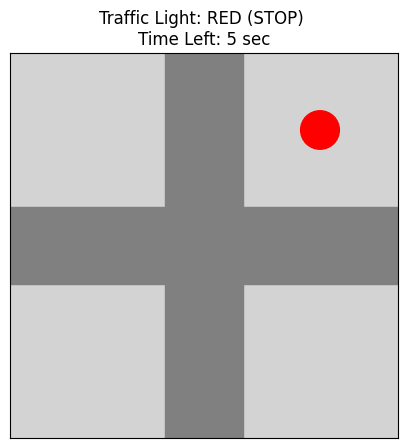

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
from IPython.display import display, clear_output

# Function to get the label for the traffic light
def get_light_label(color):
    labels = {
        'red': 'RED (STOP)',
        'yellow': 'YELLOW (WAIT)',
        'green': 'GREEN (GO)'
    }
    return labels.get(color, '').upper()

# Function to draw the traffic system with the active light
def draw_traffic_system(light_color, remaining_time):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('lightgray')

    # Draw roads
    ax.add_patch(patches.Rectangle((4, 0), 2, 10, color='gray'))  # Vertical road
    ax.add_patch(patches.Rectangle((0, 4), 10, 2, color='gray'))  # Horizontal road

    # Draw traffic light signal
    traffic_light = patches.Circle((8, 8), 0.5, color=light_color)
    ax.add_patch(traffic_light)

    # Set title with light label and countdown
    ax.set_title(f'Traffic Light: {get_light_label(light_color)} \nTime Left: {remaining_time} sec')

    clear_output(wait=True)
    display(fig)
    plt.close(fig)

# Function to run the traffic light simulation
def traffic_simulation(total_time):
    red_time = int(total_time * 7 / 17)
    yellow_time = int(total_time * 3 / 17)
    green_time = total_time - (red_time + yellow_time)

    sequence = [('red', red_time), ('yellow', yellow_time), ('green', green_time)]

    while True:
        for light, duration in sequence:
            for remaining_time in range(duration, 0, -1):
                print(f'{get_light_label(light)} - {remaining_time} sec left')
                draw_traffic_system(light, remaining_time)
                time.sleep(1)

# Run the traffic light simulation with a default cycle time
if __name__ == "__main__":
    try:
        default_time = 15
        print(f"Starting with default cycle time of {default_time} seconds...")
        traffic_simulation(default_time)
    except KeyboardInterrupt:
        total_time = int(input("Enter new total cycle time in seconds: "))
        traffic_simulation(total_time)
